This is the jupyter Notebook for the Exploratory Data Analysis of the dataset. The cell below imports all the necessary libraries for the same

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# assuming "df" is the variable name for the Dataframe 
df=pd.read_csv("E:\codeclause DS internship\credit card fraud detection\dataset\dataset.csv")

In [3]:
df.shape

(1000000, 8)

As the data is very large, we need to randomly select the tuples from the data 

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
# Separate the dataset into two parts based on 'fraud' column: fraudulent and non-fraudulent
fraudulent_data = df[df['fraud'] == 1]
non_fraudulent_data = df[df['fraud'] == 0]

# Randomly select tuples from each class
sample_size_for_fraudulent = 17000
fraudulent_sample = fraudulent_data.sample(n=sample_size_for_fraudulent, random_state=42)
non_fraudulent_sample = non_fraudulent_data.sample(n=(150000-sample_size_for_fraudulent), random_state=42)

# Concatenate the two samples to get the final random subset of tuples
random_sample = pd.concat([fraudulent_sample, non_fraudulent_sample], axis=0)

# Shuffle the subset to ensure the tuples are randomly arranged
random_sample = random_sample.sample(frac=1, random_state=42)

# 'random_sample' contains your stratified random subset of tuples


In [6]:
df=random_sample

In [7]:
df.shape

(150000, 8)

In [8]:
df[df['fraud']==0].shape

(133000, 8)

In [9]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
835517,7.893140,0.510965,0.969661,1,1,0,0,0
259207,23.734634,11.666175,0.320543,1,1,0,1,0
896246,6.353481,0.811991,3.219114,1,0,0,0,0
279016,20.415958,7.903057,0.493067,1,0,0,0,0
231673,40.799868,0.077366,1.771473,1,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 835517 to 724924
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              150000 non-null  float64
 1   distance_from_last_transaction  150000 non-null  float64
 2   ratio_to_median_purchase_price  150000 non-null  float64
 3   repeat_retailer                 150000 non-null  int64  
 4   used_chip                       150000 non-null  int64  
 5   used_pin_number                 150000 non-null  int64  
 6   online_order                    150000 non-null  int64  
 7   fraud                           150000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 10.3 MB


In [11]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,27.877809,5.345776,1.949285,0.881193,0.347013,0.098313,0.659307,0.113333
std,71.601334,27.701070,3.013862,0.323562,0.476022,0.297739,0.473944,0.317001
min,0.024602,0.000118,0.006125,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.885694,0.294342,0.485000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.022057,0.996105,1.030493,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26.344547,3.391500,2.218319,1.000000,1.000000,0.000000,1.000000,0.000000
max,8777.136420,4968.315477,126.294930,1.000000,1.000000,1.000000,1.000000,1.000000


Data Visualization

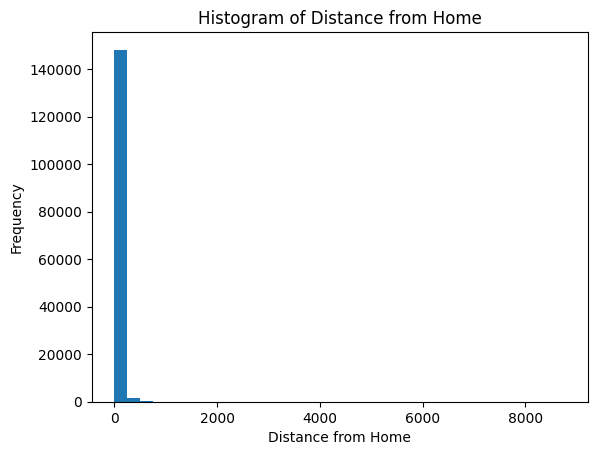

In [12]:
#for example, the histogram for distance from home featue
plt.hist(df['distance_from_home'], bins=35)
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Histogram of Distance from Home')
plt.show()

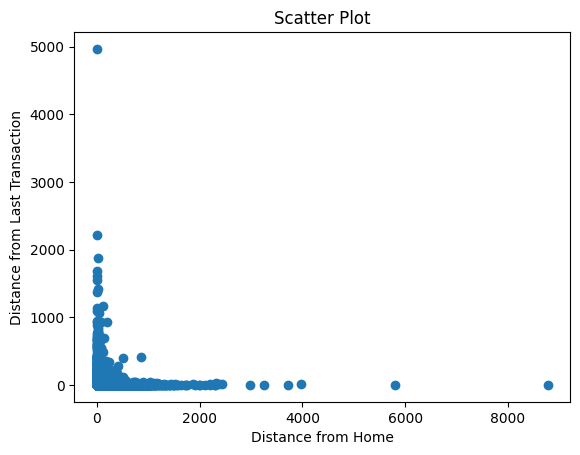

In [13]:
# now Ill construct a scatter plot between distance from home and distance from last transaction
plt.scatter(df['distance_from_home'], df['distance_from_last_transaction'])
plt.xlabel('Distance from Home')
plt.ylabel('Distance from Last Transaction')
plt.title('Scatter Plot')
plt.show()

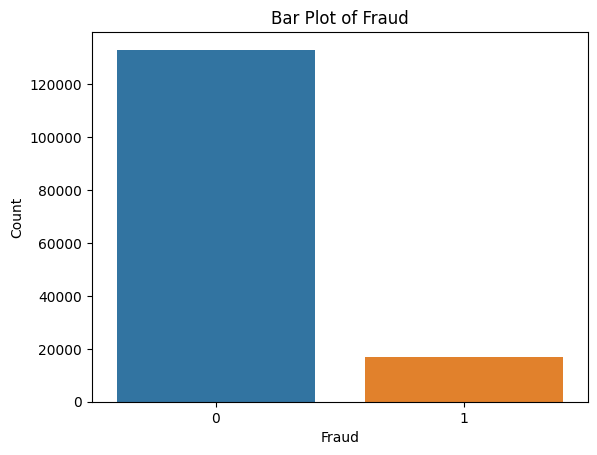

In [14]:
# Example: Bar plot of 'fraud'
sns.countplot(x='fraud', data=df)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Bar Plot of Fraud')
plt.show()

In [15]:
#check for missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

the dataset looks perfect